# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="./Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from collections import deque
import torch
from ddpg_agent import Agents

In [7]:
def save_agents(agents):
    torch.save(agents.actor_local.state_dict(), 'checkpoint_actor.pth')
    torch.save(agents.critic_local.state_dict(), 'checkpoint_critic.pth')

def ddpg(n_episodes=1000, no_increasing_episodes_threshold=50):
    agents = Agents(num_agents, state_size=state_size, action_size=action_size, random_seed=10)
    
    scores_deque = deque(maxlen=100)
    scores = []
    scores_mean = []
    
    no_increasing_episodes = 0
    env_solved = False
    
    max_average_score = 0.0
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        agents.reset()
        score = np.zeros(num_agents)
        
        num_steps = 0
        while True:
            actions = agents.act(states)

            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done

            agents.step(states, actions, rewards, next_states, dones, num_steps)
            num_steps += 1

            states = next_states
            score += rewards
            if np.any(dones):
                break 
                
        scores_deque.append(np.max(score))
        scores.append(np.max(score))
        scores_mean.append(np.mean(scores_deque))
        
        print('\rEpisode {}\tNumber of Steps: {}\tMax Score: {}\tAverage Score: {}'.format(i_episode, num_steps, np.max(score), scores_mean[-1]))
        if max_average_score >= 0.5 and (not env_solved):
            env_solved = True
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
        
        if scores_mean[-1] > max_average_score:
            no_increasing_episodes = 0
            save_agents(agents)
            max_average_score = scores_mean[-1]
            print('\nEpisode {}\tAgents saved on max average score: {}'.format(i_episode, max_average_score))
        else:
            no_increasing_episodes += 1
            if no_increasing_episodes > no_increasing_episodes_threshold and env_solved:
                print('\n{}Episodes without increasing average score. Stop training!'.format(no_increasing_episodes))
                break
            
    return scores, scores_mean

In [8]:
scores, scores_mean = ddpg()

Episode 1	Number of Steps: 15	Max Score: 0.0	Average Score: 0.0
Episode 2	Number of Steps: 14	Max Score: 0.0	Average Score: 0.0
Episode 3	Number of Steps: 14	Max Score: 0.0	Average Score: 0.0
Episode 4	Number of Steps: 14	Max Score: 0.0	Average Score: 0.0
Episode 5	Number of Steps: 14	Max Score: 0.0	Average Score: 0.0
Episode 6	Number of Steps: 15	Max Score: 0.0	Average Score: 0.0
Episode 7	Number of Steps: 14	Max Score: 0.0	Average Score: 0.0
Episode 8	Number of Steps: 14	Max Score: 0.0	Average Score: 0.0
Episode 9	Number of Steps: 14	Max Score: 0.0	Average Score: 0.0
Episode 10	Number of Steps: 32	Max Score: 0.09000000171363354	Average Score: 0.009000000171363353

Episode 10	Agents saved on max average score: 0.009000000171363353
Episode 11	Number of Steps: 15	Max Score: 0.0	Average Score: 0.008181818337603048
Episode 12	Number of Steps: 14	Max Score: 0.0	Average Score: 0.0075000001428027945
Episode 13	Number of Steps: 14	Max Score: 0.0	Average Score: 0.006923077054894888
Episode 14	

Episode 99	Number of Steps: 14	Max Score: 0.0	Average Score: 0.009898990054022182
Episode 100	Number of Steps: 15	Max Score: 0.0	Average Score: 0.00980000015348196
Episode 101	Number of Steps: 14	Max Score: 0.0	Average Score: 0.00980000015348196
Episode 102	Number of Steps: 14	Max Score: 0.0	Average Score: 0.00980000015348196
Episode 103	Number of Steps: 31	Max Score: 0.09000000171363354	Average Score: 0.010700000170618295

Episode 103	Agents saved on max average score: 0.010700000170618295
Episode 104	Number of Steps: 14	Max Score: 0.0	Average Score: 0.010700000170618295
Episode 105	Number of Steps: 33	Max Score: 0.10000000149011612	Average Score: 0.011700000185519456

Episode 105	Agents saved on max average score: 0.011700000185519456
Episode 106	Number of Steps: 14	Max Score: 0.0	Average Score: 0.011700000185519456
Episode 107	Number of Steps: 32	Max Score: 0.10000000149011612	Average Score: 0.012700000200420619

Episode 107	Agents saved on max average score: 0.012700000200420619
Ep

Episode 187	Number of Steps: 15	Max Score: 0.0	Average Score: 0.013500000219792127
Episode 188	Number of Steps: 14	Max Score: 0.0	Average Score: 0.013500000219792127
Episode 189	Number of Steps: 14	Max Score: 0.0	Average Score: 0.013500000219792127
Episode 190	Number of Steps: 14	Max Score: 0.0	Average Score: 0.013500000219792127
Episode 191	Number of Steps: 14	Max Score: 0.0	Average Score: 0.013500000219792127
Episode 192	Number of Steps: 15	Max Score: 0.0	Average Score: 0.013500000219792127
Episode 193	Number of Steps: 14	Max Score: 0.0	Average Score: 0.013500000219792127
Episode 194	Number of Steps: 14	Max Score: 0.0	Average Score: 0.013500000219792127
Episode 195	Number of Steps: 15	Max Score: 0.0	Average Score: 0.013500000219792127
Episode 196	Number of Steps: 14	Max Score: 0.0	Average Score: 0.013500000219792127
Episode 197	Number of Steps: 14	Max Score: 0.0	Average Score: 0.01160000018775463
Episode 198	Number of Steps: 14	Max Score: 0.0	Average Score: 0.01160000018775463
Episod

Episode 266	Number of Steps: 29	Max Score: 0.10000000149011612	Average Score: 0.042400000654160976

Episode 266	Agents saved on max average score: 0.042400000654160976
Episode 267	Number of Steps: 52	Max Score: 0.10000000149011612	Average Score: 0.04340000066906214

Episode 267	Agents saved on max average score: 0.04340000066906214
Episode 268	Number of Steps: 68	Max Score: 0.20000000298023224	Average Score: 0.04540000069886446

Episode 268	Agents saved on max average score: 0.04540000069886446
Episode 269	Number of Steps: 31	Max Score: 0.09000000171363354	Average Score: 0.046300000716000794

Episode 269	Agents saved on max average score: 0.046300000716000794
Episode 270	Number of Steps: 92	Max Score: 0.20000000298023224	Average Score: 0.048300000745803116

Episode 270	Agents saved on max average score: 0.048300000745803116
Episode 271	Number of Steps: 30	Max Score: 0.09000000171363354	Average Score: 0.049200000762939455

Episode 271	Agents saved on max average score: 0.049200000762939

Episode 316	Number of Steps: 30	Max Score: 0.10000000149011612	Average Score: 0.8051000120304524

Episode 316	Agents saved on max average score: 0.8051000120304524
Episode 317	Number of Steps: 32	Max Score: 0.10000000149011612	Average Score: 0.8051000120304524
Episode 318	Number of Steps: 336	Max Score: 0.9000000134110451	Average Score: 0.8131000121496618

Episode 318	Agents saved on max average score: 0.8131000121496618
Episode 319	Number of Steps: 30	Max Score: 0.10000000149011612	Average Score: 0.8132000121474267

Episode 319	Agents saved on max average score: 0.8132000121474267
Episode 320	Number of Steps: 30	Max Score: 0.10000000149011612	Average Score: 0.8142000121623277

Episode 320	Agents saved on max average score: 0.8142000121623277
Episode 321	Number of Steps: 31	Max Score: 0.10000000149011612	Average Score: 0.8142000121623277
Episode 322	Number of Steps: 67	Max Score: 0.20000000298023224	Average Score: 0.8153000121749937

Episode 322	Agents saved on max average score: 0.815

Episode 372	Number of Steps: 69	Max Score: 0.20000000298023224	Average Score: 1.1923000177927314

Episode 372	Agents saved on max average score: 1.1923000177927314
Episode 373	Number of Steps: 170	Max Score: 0.4000000059604645	Average Score: 1.1953000178374351

Episode 373	Agents saved on max average score: 1.1953000178374351
Episode 374	Number of Steps: 224	Max Score: 0.6000000089406967	Average Score: 1.1963000178523362

Episode 374	Agents saved on max average score: 1.1963000178523362
Episode 375	Number of Steps: 857	Max Score: 2.2000000327825546	Average Score: 1.2164000181481243

Episode 375	Agents saved on max average score: 1.2164000181481243
Episode 376	Number of Steps: 456	Max Score: 1.2000000178813934	Average Score: 1.202400017939508
Episode 377	Number of Steps: 1001	Max Score: 2.600000038743019	Average Score: 1.202400017939508
Episode 378	Number of Steps: 1001	Max Score: 2.7000000402331352	Average Score: 1.2174000181630253

Episode 378	Agents saved on max average score: 1.2174

In [12]:
import pickle
scores_path = './scores.pickle'
scores_mean_path = './scores_mean.pickle'

with open(scores_path, 'wb') as fp:
    pickle.dump(scores, fp)
with open(scores_mean_path, 'wb') as fp:
    pickle.dump(scores_mean, fp)

with open(scores_path, 'rb') as f:
    scores_result = pickle.load(f)
with open(scores_mean_path, 'rb') as f:
    scores_mean_result = pickle.load(f)

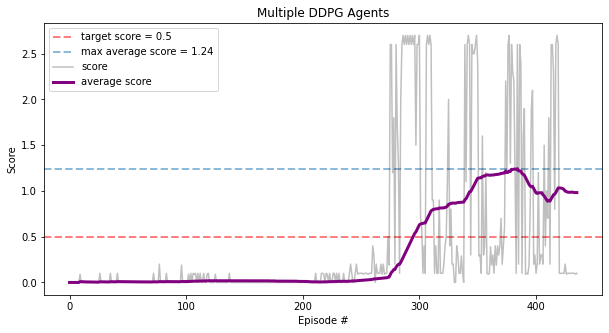

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=[10, 5])

ax.axhline(0.5, c="red", ls='--', linewidth=2, alpha=0.5, label='target score = {}'.format(0.5))
ax.axhline(np.max(scores_mean_result), ls='--', linewidth=2, alpha=0.5, label='max average score = {:.2f}'.format(np.max(scores_mean_result)))
ax.plot(scores_result, "-", c="black", alpha=0.25, label='score')
ax.plot(scores_mean_result, "-", c="purple", linewidth=3, label='average score')

ax.set_xlabel("Episode #")
ax.set_ylabel("Score")
ax.set_title("Multiple DDPG Agents")
ax.legend()


fig.savefig("./multiDDPG_result.jpg")

In [10]:
env.close()